In [1]:
# The example of dense net learning

import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

# Loading the data: Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train_full.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
# Validation and normalization of the data 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_valid.shape

(5000, 28, 28)

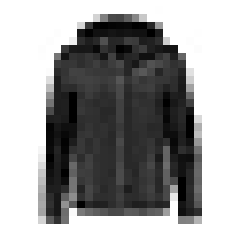

In [9]:
# Simple image
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
# In order to use the names in English

class_names = ['T-shirt', 'Pants', 'Sweater', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneakers', 'Handbag', 'Half-shoe']

In [12]:
class_names[y_train[0]]

'Coat'

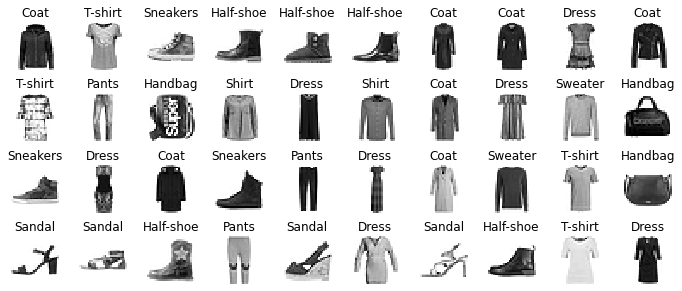

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [14]:
# Definition of the model architecture
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Model compilation
# sgd - stochastic gradient descent 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
# Network learning
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7046 - accuracy: 0.7705 - val_loss: 0.4944 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4840 - accuracy: 0.8323 - val_loss: 0.4411 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4410 - accuracy: 0.8446 - val_loss: 0.4357 - val_accuracy: 0.8504
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4123 - accuracy: 0.8551 - val_loss: 0.3961 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3912 - accuracy: 0.8620 - val_loss: 0.3863 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8683 - val_loss: 0.3743 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3618 - accuracy: 0.8718 - val_loss: 0.3637 - val_accuracy:

In [18]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

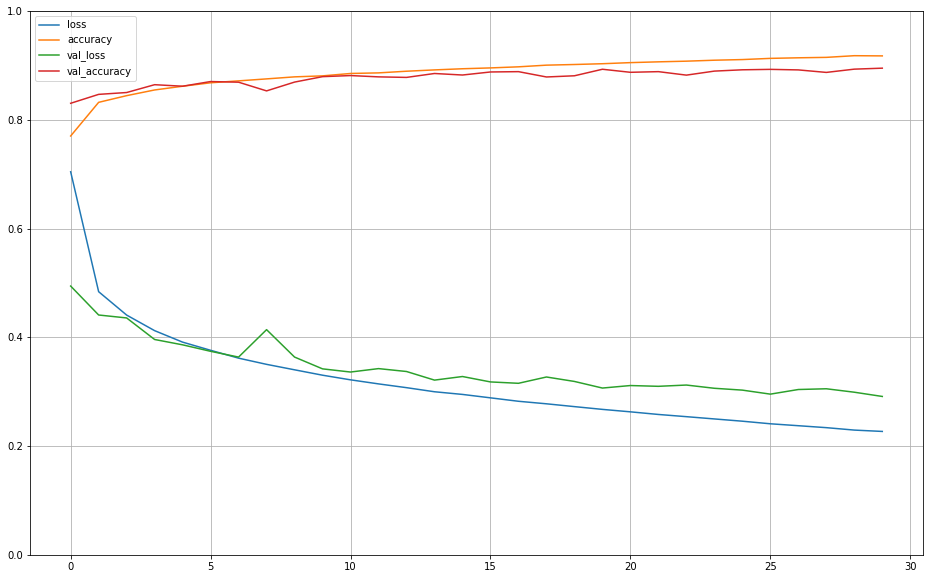

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
# Data evaluation
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8847


[0.32112640142440796, 0.8847000002861023]

In [22]:
# Prediction, applied to new data
# In the vectors there are probabilities of concrete ten classes

X_new = X_test[:100]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.3 , 0.  , 0.01, 0.  , 0.  , 0.  , 0.69, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.08, 0.  , 0.9 , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.03, 0.03, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.22, 0.  , 0.

In [23]:
# Let us recall these ten classes
class_names

['T-shirt',
 'Pants',
 'Sweater',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneakers',
 'Handbag',
 'Half-shoe']

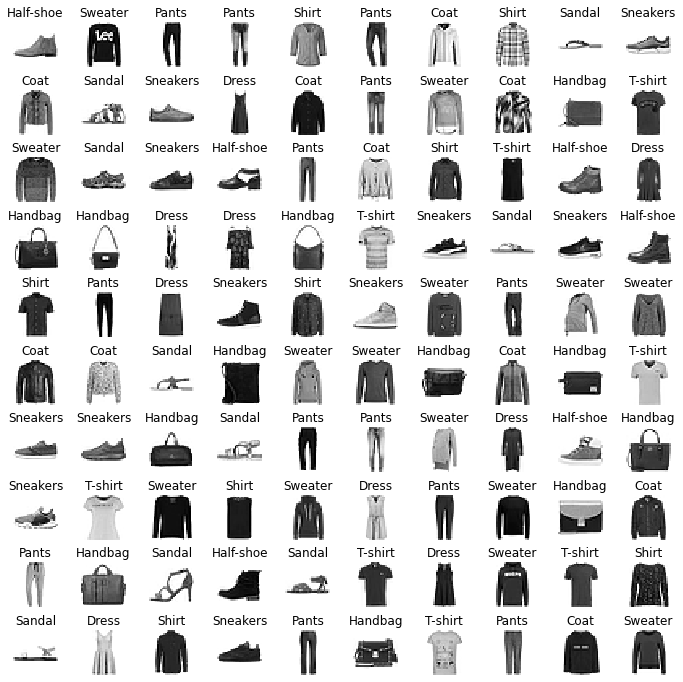

In [24]:
# And this is the original data
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [25]:
# We can predict the class
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7,
       6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1,
       6, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 0, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2])

In [26]:
np.array(class_names)[y_pred]

array(['Half-shoe', 'Sweater', 'Pants', 'Pants', 'Shirt', 'Pants', 'Coat',
       'Shirt', 'Sandal', 'Sneakers', 'Coat', 'Sandal', 'Sandal', 'Dress',
       'Coat', 'Pants', 'Sweater', 'Sweater', 'Handbag', 'T-shirt',
       'Sweater', 'Sandal', 'Sneakers', 'Sandal', 'Pants', 'Sweater',
       'Shirt', 'T-shirt', 'Half-shoe', 'Dress', 'Handbag', 'Handbag',
       'Dress', 'Dress', 'Handbag', 'T-shirt', 'Sneakers', 'Sandal',
       'Sneakers', 'Half-shoe', 'T-shirt', 'Pants', 'Shirt', 'Sneakers',
       'Shirt', 'Sneakers', 'Sweater', 'Pants', 'Sweater', 'Shirt',
       'Coat', 'Sweater', 'Sandal', 'Handbag', 'Sweater', 'Sweater',
       'Handbag', 'Shirt', 'Handbag', 'T-shirt', 'Sneakers', 'Sneakers',
       'Handbag', 'Sandal', 'Pants', 'Pants', 'Shirt', 'Dress',
       'Sneakers', 'Handbag', 'Sneakers', 'T-shirt', 'Sweater', 'Shirt',
       'Sweater', 'Dress', 'Pants', 'Sweater', 'Handbag', 'Coat', 'Pants',
       'Handbag', 'Sandal', 'Half-shoe', 'Sandal', 'T-shirt', 'Dress',
      

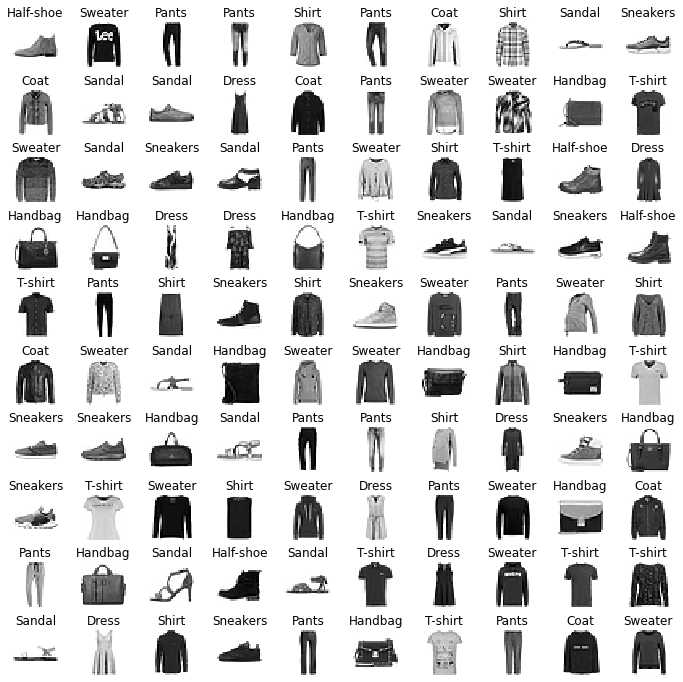

In [27]:
# Let us see what was predicted 

n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [29]:
#Saving the trained model to the file (saved_model.pb)
writingPath = '/Users/adrianmorenomonterde/Desktop/MorenoMonterde09'
model.save(writingPath)

INFO:tensorflow:Assets written to: /Users/adrianmorenomonterde/Desktop/MorenoMonterde09/assets


In [30]:
# Loading the model from the file

reconstructed_model = keras.models.load_model(writingPath)

In [31]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
